In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as SS
import numpy as np

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
print(data.isna().sum())
print(data.info())
for col in data:
  print(col + " " + str(data[col].nunique()))

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 

In [7]:
data['Transmission Type'].value_counts()
# data = data.apply(lambda x : x.str().strip() if x.dtype == 'object' else x)

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

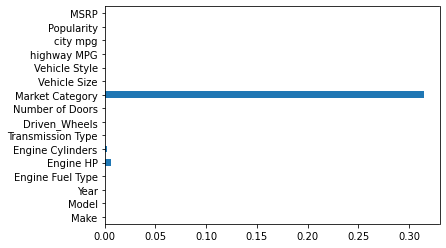

In [8]:
data.isna().mean().plot(kind = 'barh')

In [9]:
data = data.replace('NA', np.nan)
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
print(data.duplicated().sum())
data.drop_duplicates()
data.info()

715
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

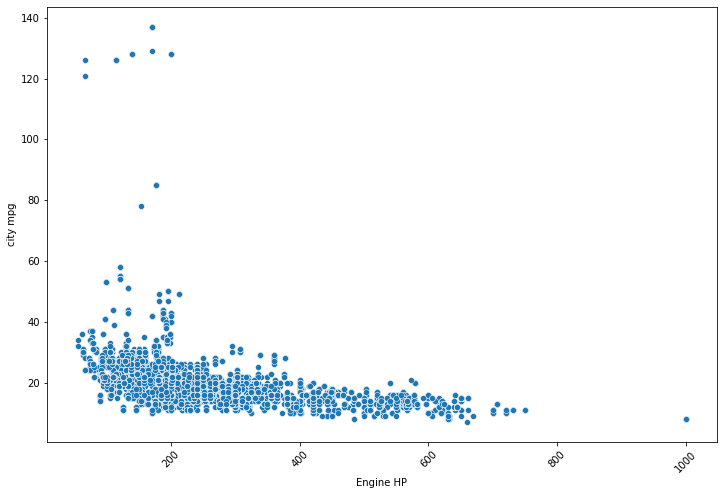

In [11]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(x = 'Engine HP', y = 'city mpg', data = data)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

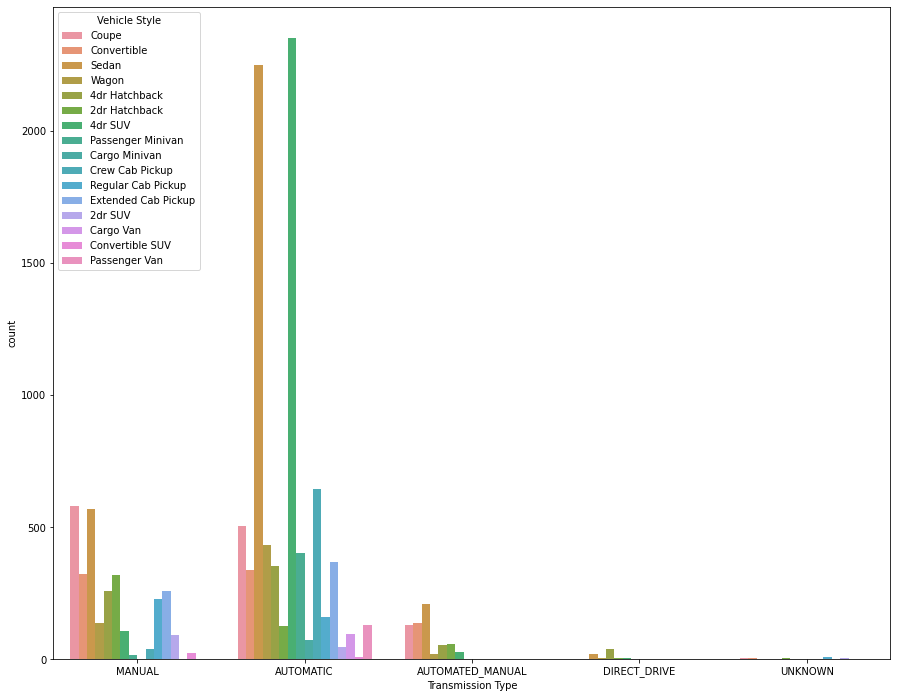

In [12]:
fig, ax = plt.subplots(figsize = (15, 12))
sns.countplot(x = 'Transmission Type', hue = 'Vehicle Style', data = data, ax = ax)
plt.xticks(rotation = 0)

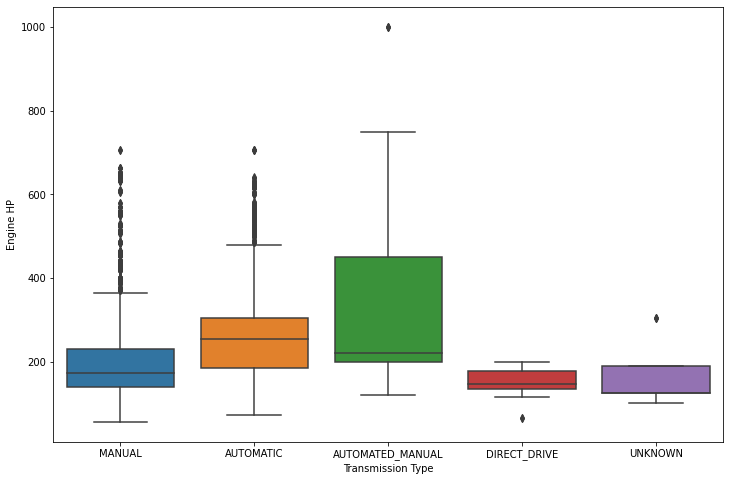

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Transmission Type', y = 'Engine HP', data = data)

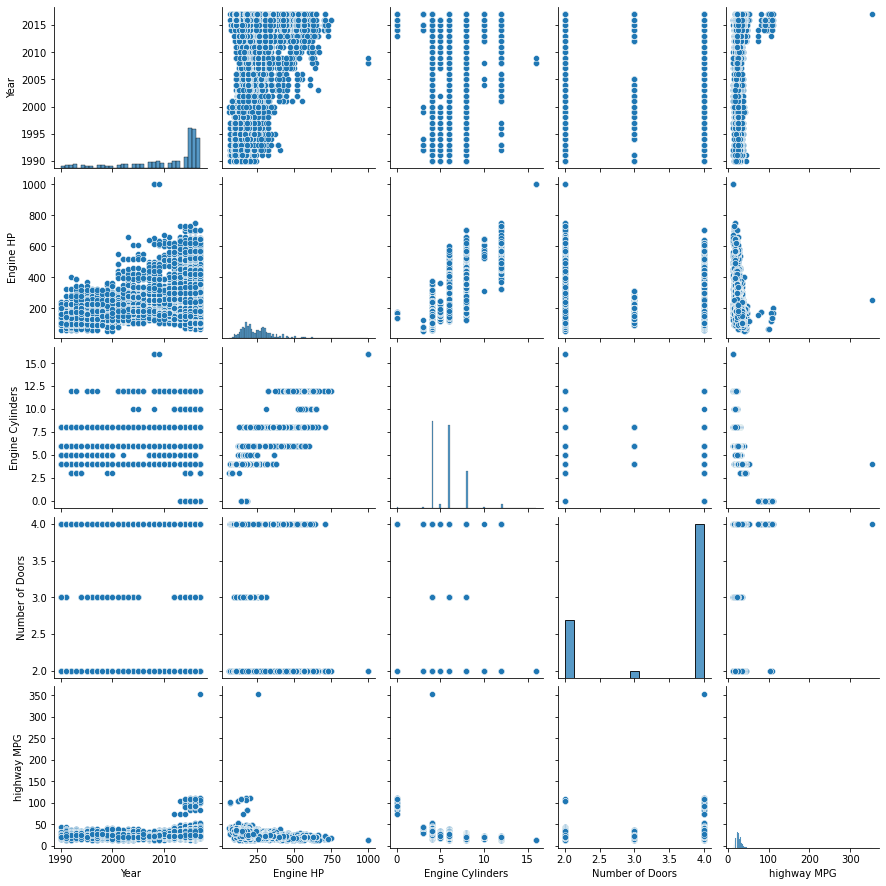

In [14]:
numeric_cols = data.select_dtypes(include = np.number).columns.tolist()
sns.pairplot(data, vars = numeric_cols[0:5], palette = 'Set3')

In [15]:
data_num = data[numeric_cols]
print(data_num.corr().mean(), "\n")

Year                0.291394
Engine HP           0.235330
Engine Cylinders    0.118562
Number of Doors     0.135691
highway MPG         0.131805
city mpg            0.125605
Popularity          0.128842
MSRP                0.241010
dtype: float64 



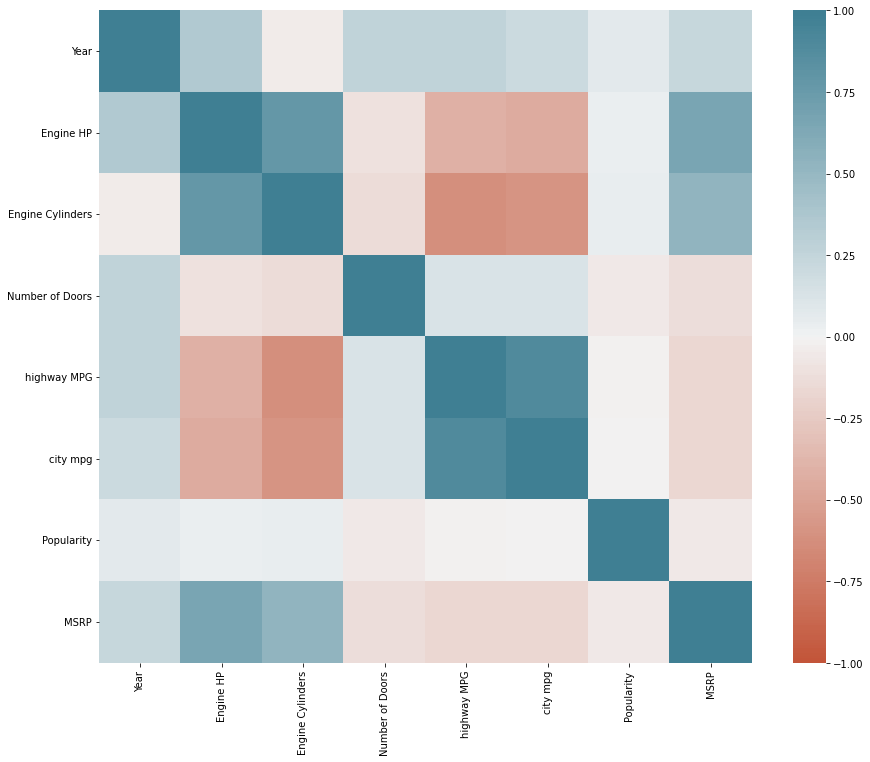

In [16]:
fig, ax = plt.subplots(figsize = (15, 12))
sns.heatmap(data_num.corr(), square = True, vmin = -1, vmax = 1, center=0, cmap = sns.diverging_palette(20, 220, n = 200))

In [17]:
data_num['Engine HP'].fillna(value = data_num['Engine HP'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [18]:
data_num['Engine Cylinders'].fillna(data_num['Engine Cylinders'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [19]:
data_num['Number of Doors'].fillna(3, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [20]:
print(data_num.columns.tolist())
X = SS().fit_transform(data_num)
kmeans = KMeans(n_clusters = 5, init = 'random')
kmeans.fit(X)
pred = kmeans.predict(X)

['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


In [21]:
data = data_num.dropna()

In [22]:
data_num.isna().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

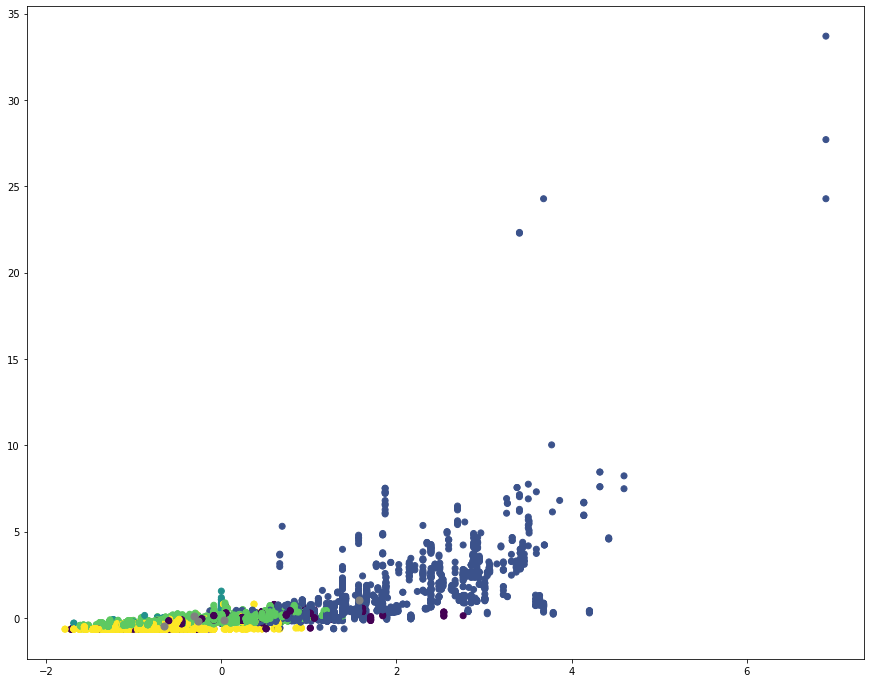

In [23]:
fig, ax = plt.subplots(figsize = (15, 12))
plt.scatter(X[:,1], X[:,7], c = pred, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,7], c = 'grey', s = 50)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X)
pcad = pca.transform(X)
print(pca.explained_variance_ratio_)

[0.38553536 0.21296917 0.13172477 0.12747543 0.06847232 0.04433856]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


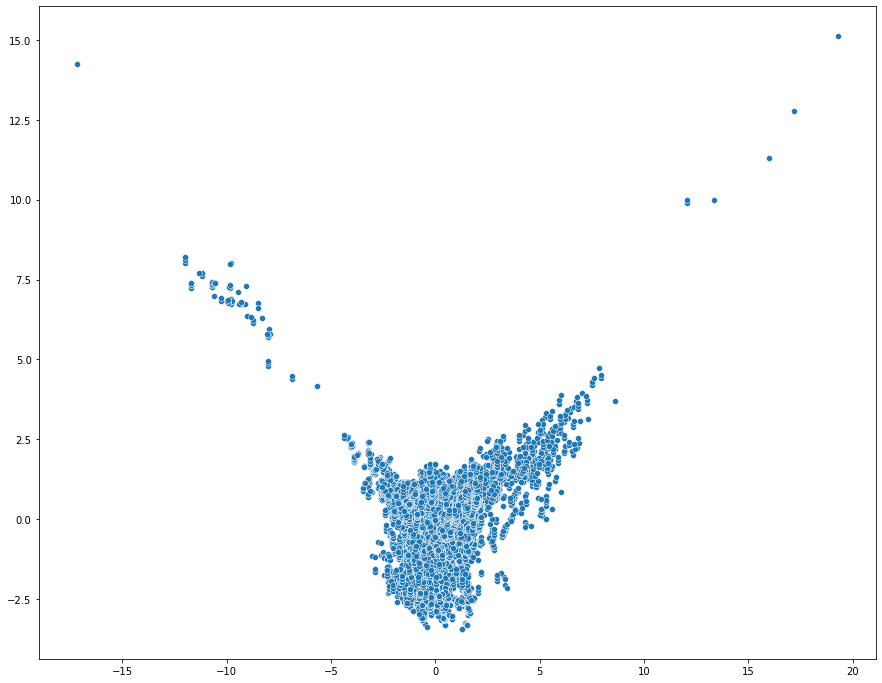

In [25]:
fig, ax = plt.subplots(figsize = (15, 12))
sns.scatterplot(pcad[:, 0], pcad[:, 1])